In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import anndata
import scanpy as sc 
from itertools import combinations
import seaborn as sns
import statsmodels.stats.multitest as multi

In [3]:
adata = sc.read('myeloid-covariates_added.h5ad')
sc.pp.highly_variable_genes(adata, n_top_genes = adata.var.shape[0], flavor = 'seurat_v3')
adata_subset = adata[:, adata.var['highly_variable']]

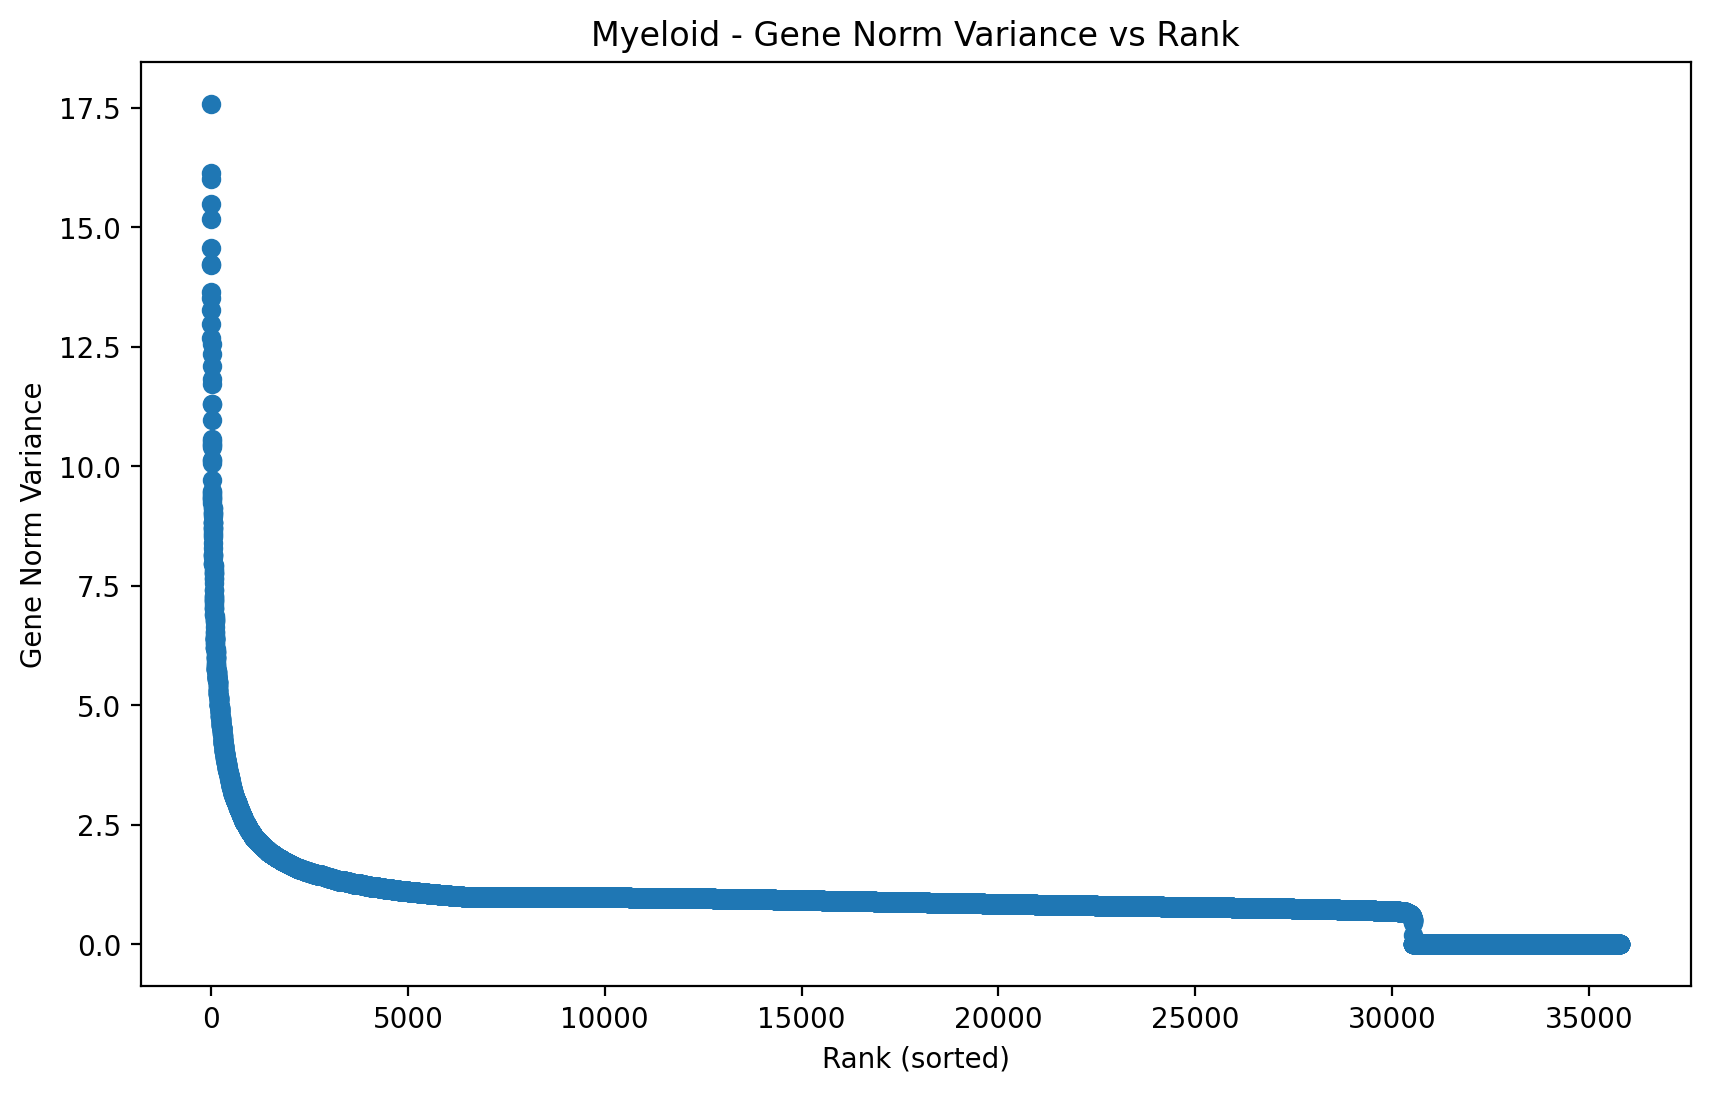

In [4]:
rank_variance_df = adata.var[['highly_variable_rank', 'variances_norm']].sort_values('highly_variable_rank')
plt.figure(figsize=(10, 6), dpi = 200)
plt.scatter(rank_variance_df['highly_variable_rank'], rank_variance_df['variances_norm'])
plt.xlabel('Rank (sorted)')
plt.ylabel('Gene Norm Variance')
plt.title('Myeloid - Gene Norm Variance vs Rank')
plt.grid(False)
plt.show()

In [6]:
adata = sc.read('data_tum_merged_v5.h5ad')
adata.layers["counts"] = adata.X.copy()
adata.obs['original_total_counts'] = adata.obs['nCount_RNA']
sc.pp.normalize_total(adata, exclude_highly_expressed=True)
sc.pp.log1p(adata)
adata.layers["log_counts"] = adata.X.copy()
df = adata.to_df(layer='log_counts').transpose()
sc.pp.highly_variable_genes(adata, layer = 'counts', n_top_genes = adata.var.shape[0], flavor = 'seurat_v3')

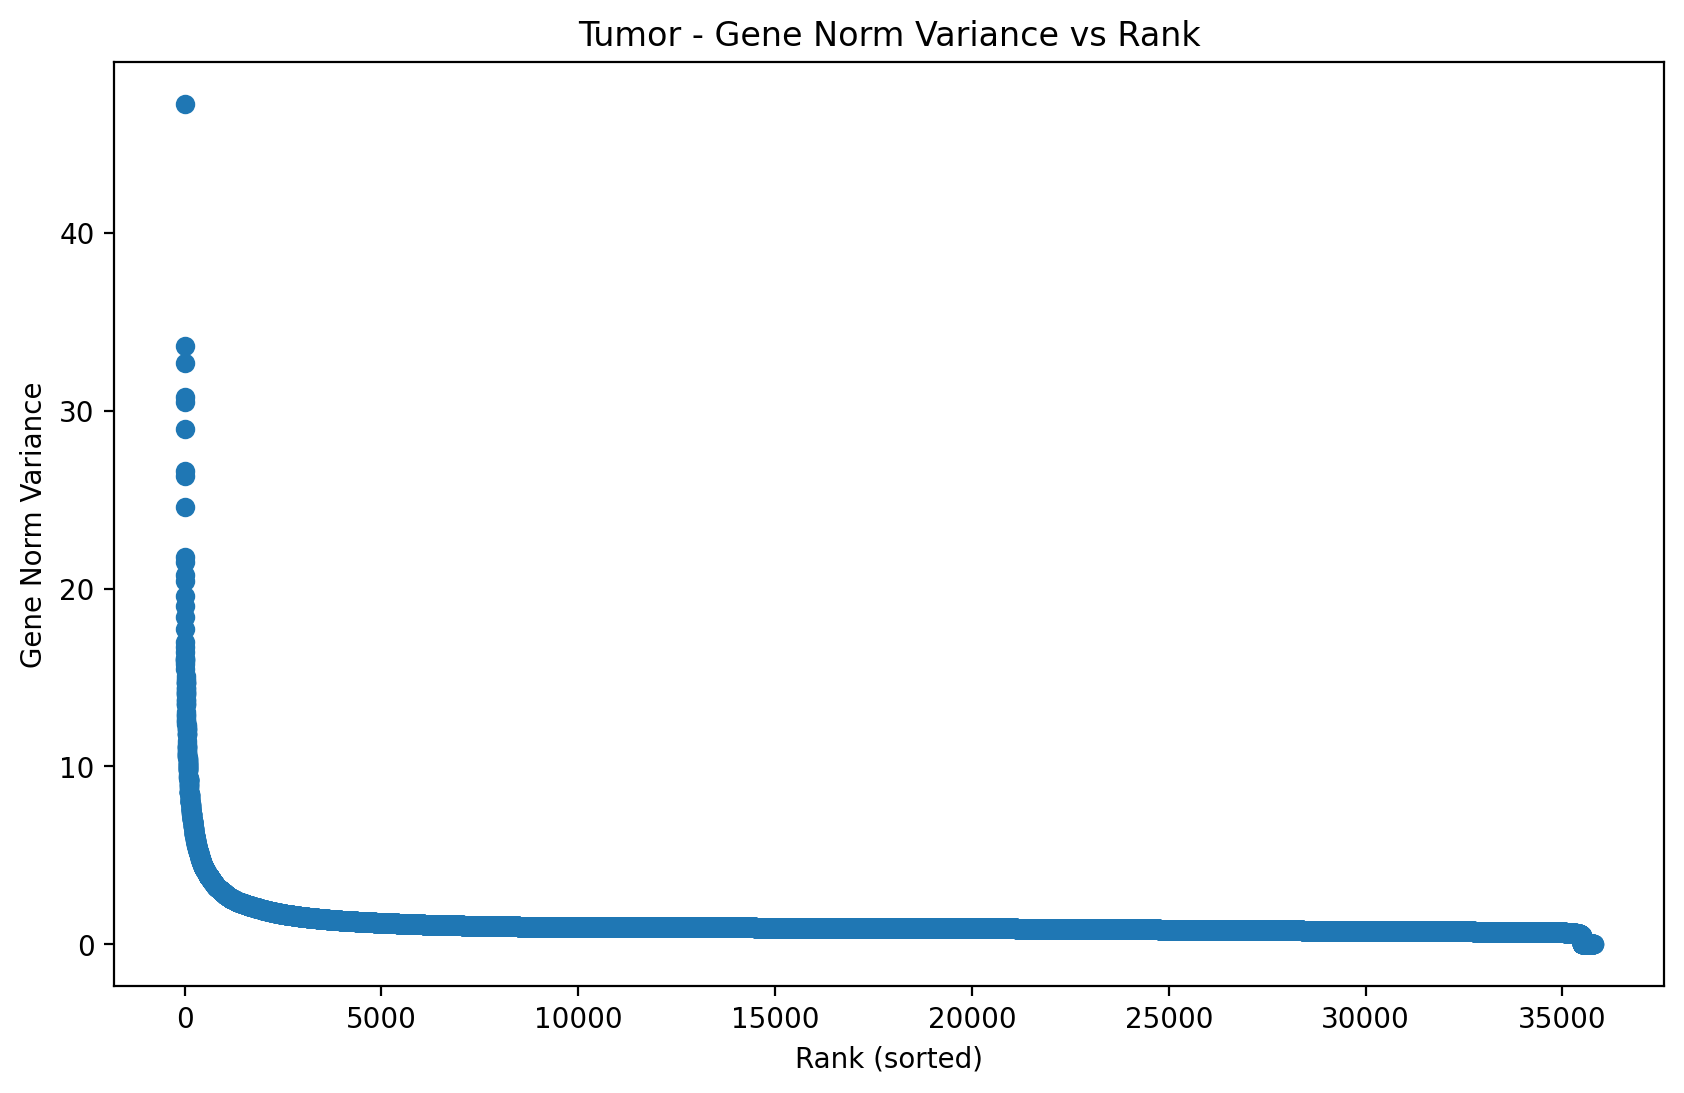

In [7]:
rank_variance_df = adata.var[['highly_variable_rank', 'variances_norm']].sort_values('highly_variable_rank')
plt.figure(figsize=(10, 6), dpi = 200)
plt.scatter(rank_variance_df['highly_variable_rank'], rank_variance_df['variances_norm'])
plt.xlabel('Rank (sorted)')
plt.ylabel('Gene Norm Variance')
plt.title('Tumor - Gene Norm Variance vs Rank')
plt.grid(False)
plt.show()

In [8]:
adata = sc.read('tcells_decipher_trajectories_091123 (1).h5ad')
sc.pp.highly_variable_genes(adata, layer = 'counts', n_top_genes = adata.var.shape[0], flavor = 'seurat_v3')
adata_subset = adata[:, adata.var['highly_variable']]

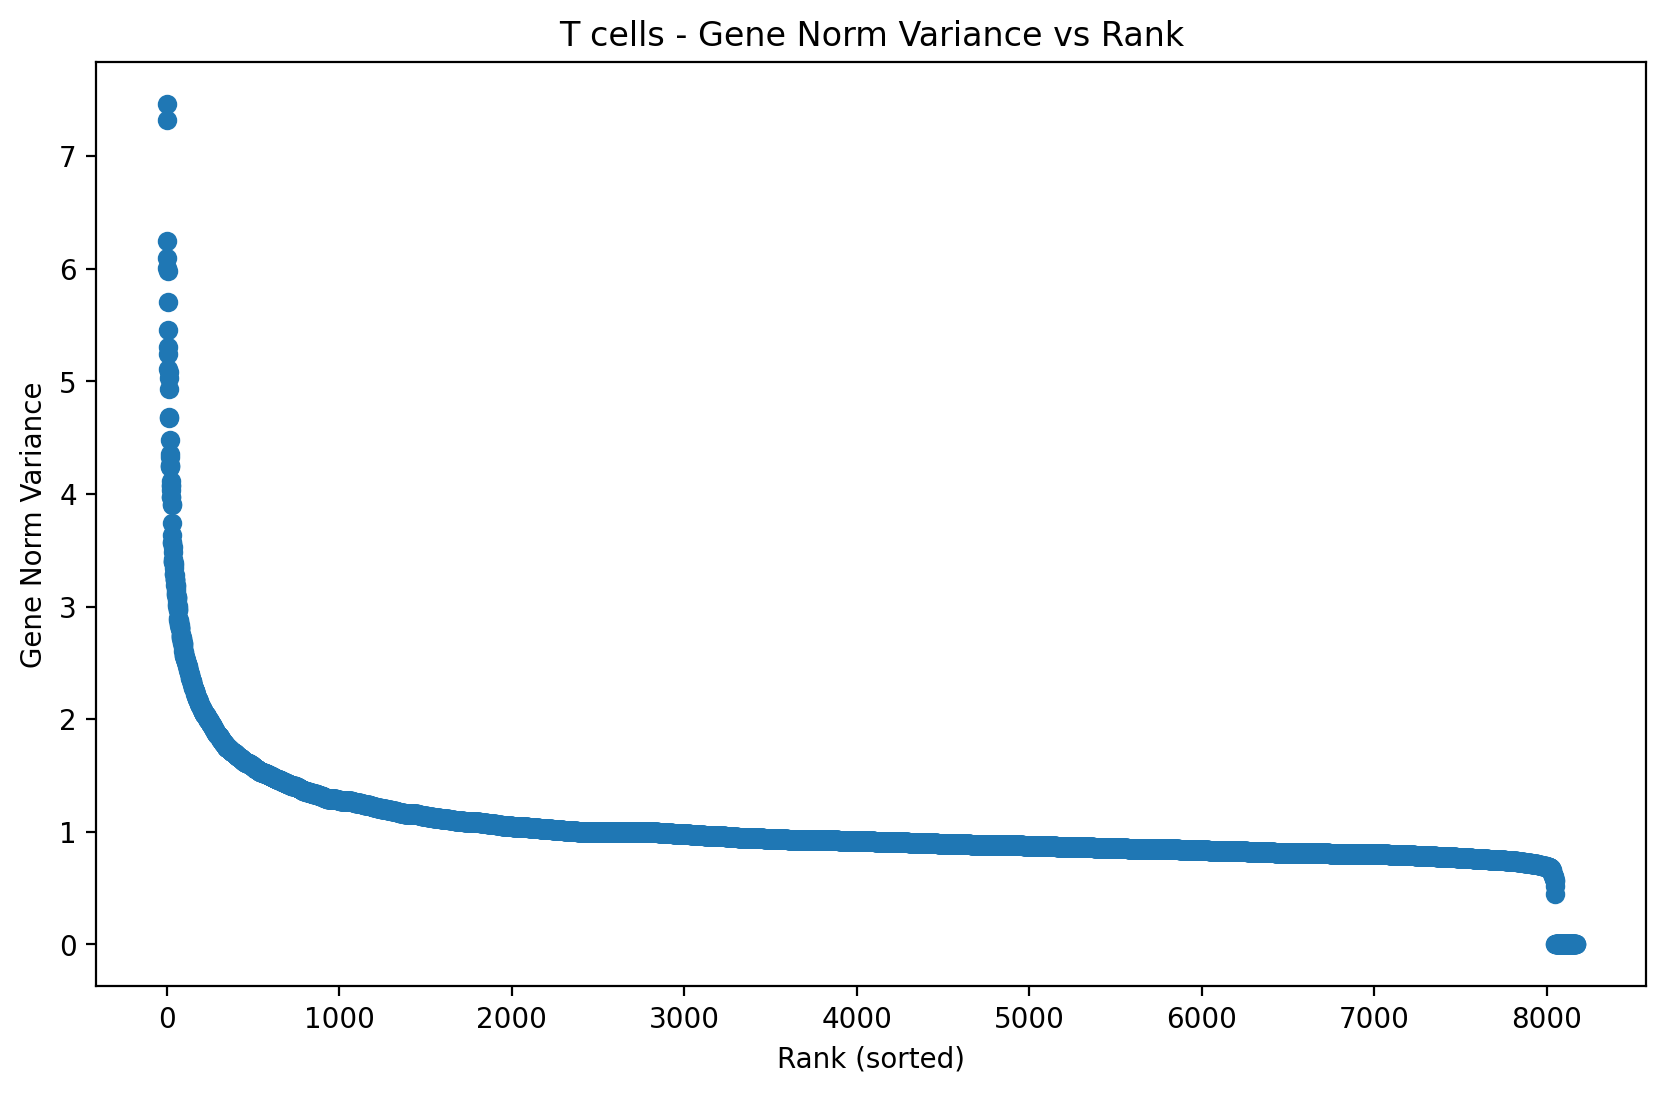

In [9]:
rank_variance_df = adata.var[['highly_variable_rank', 'variances_norm']].sort_values('highly_variable_rank')
plt.figure(figsize=(10, 6), dpi = 200)
plt.scatter(rank_variance_df['highly_variable_rank'], rank_variance_df['variances_norm'])
plt.xlabel('Rank (sorted)')
plt.ylabel('Gene Norm Variance')
plt.title('T cells - Gene Norm Variance vs Rank')
plt.grid(False)
plt.show()